In [13]:
import numpy as np
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h3>Student: Eduardo S. Ito (RA 159086)</h3>'))
display(HTML('<h3>Student: Thales E. Nazatto (RA 074388)</h3>'))
display(HTML('<h1>Project 2: Evolutionary Computing</h1>'))
from PIL import Image
import os
os.startfile('p2.pdf')

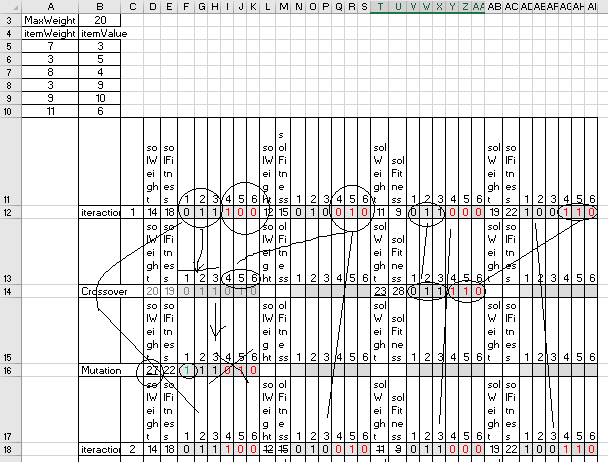

In [19]:
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h2>Abstração Inicial</h2>'))
from PIL import Image
path="abstraction.png"
display(HTML('<p>Conforme referência [1], o problema da mochila (knapsack problem) é um problema de otimização\
               combinatória, cujo objetivo é preencher uma mochila com o maior valor possível, não excedendo a \
               capacidade máxima. A formulação do problem é extremamente simples, porém a solução é mais complexa,\
               inclusive faz parte dos 21 problemas NP-completos de Richard Karp.</p>'))
display(HTML('<p>O modelo evolucionário adotado será o Algoritmo Genético (GA).</p>'))
display(HTML('<p>A implementação foi realizada utilizado mecanismo de OOP (Object Oriented Programming). \
               A definição do problema é tratada pela classe KnapsackProblem (em problem.py), onde a função\
               de fitness está implementada. A geração da população é realizada pela classe GenerationManager \
               (em generation.py). A seleção da população pode ser realizada através de dos seguintes métodos \
               roulette wheel, tournament battle royale e tournament playoff gerenciada pela classe Selection \
               (em selection.py). A reprodução (crossover) pode ser realizada pelo método Asexual, Sexual com \
               apenas um simples ponto, sexual em dois pontos na classe Reproduction (em reproduction.py).\
               A mutação pode ser realizada pelos métodos generative, swap, sequence swap pela classe Mutation \
               (em mutation.py). A controle da geração da nova população bem como encontrar as medidas de fitness, \
               é realizada pela classe GeneticalgorithmFacade (em genetic_algorithm.py). A chamada de execução do \
               algoritmo genético é realizada pelo método run_ga definido aqui no jupyter notebook \
               com entrada de parâmetros número de gerações (generations), que também é o critério de parada,\
               o tamanho da população de cromossomos (population_size), taxa de reprodução \
               (crossover_probability), taxa de mutação (mutation_probability), vetores de valores, custos, pesos e \
               o peso máximo que um repositório pode carregar, pode ser uma mochila, um caminhão, etc.</p>'))
display(HTML('<p>A figura abaixo ilustra como será resolvido um problema em alto nível.</p>'))
display(Image.open(path))

display(HTML('<h3>Referências </h3>'))
display(HTML('<p>[1] https://pt.wikipedia.org/wiki/Problema_da_mochila</p>'))
display(HTML('<p>[2] https://www.youtube.com/watch?v=9kbzMeEBvUY</p>'))

In [6]:
from knapsack.generation import GenerationManager, GenerationStrategy
from knapsack.genetic_algorithm import GeneticAlgorithmFacade
from knapsack.mutation import Mutation, MutationStrategy
from knapsack.problem import KnapsackProblem, ProblemType
from knapsack.reproduction import Reproduction, ReproductionStrategy
from knapsack.selection import Selection, SelectionStrategy

class Config:
    def __init__(self):
        pass


def run_ga(generations,population_size,crossover_probability,mutation_probability,values,costs,weights,cargo):

    config=Config
    config.problem=KnapsackProblem(type=ProblemType.MAXIMIZATION,
                    values=values,
                    costs=costs,
                    weights=weights,
                    cargo=cargo)
                                   
    selection=Selection(config.problem, SelectionStrategy.TOURNAMENT_BATTLE_ROYALE)
    reproduction=Reproduction(ReproductionStrategy.SEXUAL_SINGLE_POINT, crossover_probability)
    mutation=Mutation(MutationStrategy.GENERATIVE, mutation_probability)

    config.generation=GenerationManager(config.problem, GenerationStrategy.EXCHANGE, selection, reproduction, mutation)
    config.population_size=population_size
    config.generations=generations

    GeneticAlgorithmFacade(config).execute()

In [7]:
# Caso 1: Cargo

generations = 100
population_size = 100
crossover_probability = 0.8
mutation_probability = 0.2
values=[0, 1]
costs=[100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400, 230, 550]
weights=[50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50, 30, 70]
cargo=600

run_ga(generations,population_size,crossover_probability,mutation_probability,values,costs,weights,cargo)

Generation 1
[1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0] Fitness: 1520 Cost: 1520 Cargo: 400
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0] Fitness: 1240 Cost: 1240 Cargo: 230
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2210 Cost: 2210 Cargo: 390
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 1610 Cost: 1610 Cargo: 330
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1] Fitness: 1400 Cost: 1400 Cargo: 290
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1] Fitness: 2450 Cost: 2450 Cargo: 560
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 3320 Cargo: 700
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0] Fitness: 1700 Cost: 1700 Cargo: 390
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1] Fitness: 2390 Cost: 2390 Cargo: 510
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0] Fitness: 1700 Cost: 1700 Cargo: 390
[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0] Fitness: 1650 Cost: 1650 Cargo: 340
[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0] Fitness: 2050 Cost: 2050 Cargo: 430
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1] Fitness: 2810 Cost: 2810 Cargo: 470
[

Generation 3
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2980 Cost: 2980 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 600
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 600
[0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1] Fitness: 2560 Cost: 2560 Cargo: 540
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2730 Cost: 2730 Cargo: 510
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 500
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 580

Generation 5
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3490 Cargo: 660
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 570
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3010 Cost: 3010 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3090 Cost: 3090 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[

Generation 7
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 490

Generation 9
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600

Generation 11
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 480
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 480
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 480
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 480
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 59

Generation 13
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3540 Cargo: 610
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3540 Cargo: 610
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3540 Cargo: 610
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0

Generation 15
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 17
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 19
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3070 Cost: 3070 Cargo: 590
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3070 Cost: 3070 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0] Fitness: 2510 Cost: 2510 Cargo: 47

Generation 21
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3530 Cost: 3530 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3760 Cargo: 630
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3710 Cargo: 680
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0

Generation 23
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 510
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 0, 0,

Generation 25
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3310 Cost: 3310 Cargo: 530
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 580
[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 2810 Cargo: 610
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600


Generation 27
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3210 Cost: 3210 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 51

Generation 29
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3540 Cargo: 610
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600


Generation 31
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3010 Cost: 3010 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3010 Cost: 3010 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3010 Cost: 3010 Cargo: 530
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 510


Generation 33
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3310 Cost: 3310 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3310 Cost: 3310 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3310 Cost: 3310 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 35
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600


Generation 37
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2760 Cost: 2760 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3210 Cost: 3210 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 3220 Cargo: 650


Generation 39
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 580
[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 580
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 580
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 41
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3760 Cargo: 630
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3130 Cost: 3130 Cargo: 560
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: -1 Cost: 3450 Cargo: 620
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0

Generation 43
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2710 Cost: 2710 Cargo: 490
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 50

Generation 45
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3490 Cargo: 660
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3710 Cargo: 680
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3760 Cargo: 630
[0, 

Generation 47
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 500
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0] Fitness: 2890 Cost: 2890 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 510
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 49
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 570
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 570
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3680 Cargo: 680
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3410 Cargo: 680
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0

Generation 51
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 510
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600


Generation 53
[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2760 Cost: 2760 Cargo: 520
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 490
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 55
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 520
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 2980 Cargo: 660
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 2980 Cargo: 660
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 2980 Cargo: 660
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[0, 1,

Generation 57
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 510
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2760 Cost: 2760 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2760 Cost: 2760 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2760 Cost: 2760 Cargo: 560
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 59
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3290 Cost: 3290 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2150 Cost: 2150 Cargo: 450
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3290 Cost: 3290 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 61
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 650
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0

Generation 63
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3110 Cost: 3110 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3130 Cost: 3130 Cargo: 550
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3310 Cost: 3310 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 65
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3450 Cargo: 630
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3450 Cargo: 630
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3450 Cargo: 630
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 

Generation 67
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 510
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 510
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2960 Cost: 2960 Cargo: 490
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3170 Cost: 3170 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 69
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3010 Cost: 3010 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 2960 Cost: 2960 Cargo: 540
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3310 Cost: 3310 Cargo: 530
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 480
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 71
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0] Fitness: 2880 Cost: 2880 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 550
[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3330 Cargo: 630
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3330 Cargo: 630
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3330 Cargo: 630
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3530 Cost: 3530 Cargo: 600
[0, 

Generation 73
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 540
[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2460 Cost: 2460 Cargo: 460
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 520
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 520
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 60

Generation 75
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 77
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3360 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 500
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3700 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 500
[0

Generation 79
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 3150 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 81
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 660
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: -1 Cost: 3550 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3350 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 

Generation 83
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 3200 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 3090 Cost: 3090 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 3090 Cost: 3090 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 3090 Cost: 3090 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 85
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 87
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1] Fitness: 2540 Cost: 2540 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 55

Generation 89
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3540 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3540 Cargo: 610
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3540 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: -1 Cost: 3400 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1

Generation 91
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 540
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3550 Cargo: 650
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 520


Generation 93
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2690 Cost: 2690 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3480 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3480 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 95
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3700 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 97
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 3320 Cost: 3320 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 99
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3480 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550


In [12]:
# Caso 2: Knapsack problem

# Knapsack maximum capabilityKnapsack
maxWeight=20

# Product List for Knapsack
popgen={1: [7, 3], 2: [3, 5], 3: [8, 4], 4: [3, 9], 5: [9, 10], 6: [11, 6] }

generations = 100
population_size = 4
crossover_probability = 0.8
mutation_probability = 0.2
values=[0, 1]
costs=[3, 5, 4, 9, 10, 6]
weights=[7, 3, 8, 3, 9, 11]
cargo=20

run_ga(generations,population_size,crossover_probability,mutation_probability,values,costs,weights,cargo)

Generation 1
[1, 1, 1, 0, 1, 0] Fitness: -1 Cost: 22 Cargo: 27
[0, 1, 1, 1, 0, 1] Fitness: -1 Cost: 24 Cargo: 25
[1, 1, 1, 0, 0, 0] Fitness: 12 Cost: 12 Cargo: 18
[1, 0, 0, 1, 0, 0] Fitness: 12 Cost: 12 Cargo: 10

Best: 12 Mean: 5.5 Worst: -1

Generation 2
[1, 1, 1, 0, 0, 0] Fitness: 12 Cost: 12 Cargo: 18
[1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 21 Cargo: 21
[1, 0, 1, 0, 0, 1] Fitness: -1 Cost: 13 Cargo: 26
[1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 21 Cargo: 21

Best: 12 Mean: 2.25 Worst: -1

Generation 3
[1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 21 Cargo: 21
[1, 1, 0, 1, 0, 1] Fitness: -1 Cost: 23 Cargo: 24
[1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 21 Cargo: 21
[1, 1, 1, 0, 0, 0] Fitness: 12 Cost: 12 Cargo: 18

Best: 12 Mean: 2.25 Worst: -1

Generation 4
[1, 1, 1, 0, 0, 0] Fitness: 12 Cost: 12 Cargo: 18
[1, 1, 1, 0, 0, 0] Fitness: 12 Cost: 12 Cargo: 18
[1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 21 Cargo: 21
[1, 1, 1, 0, 0, 0] Fitness: 12 Cost: 12 Cargo: 18

Best: 12 Mean: 8.75 Worst: -1

Generation 5
[1, 1, 1

[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[1, 0, 0, 1, 0, 1] Fitness: -1 Cost: 18 Cargo: 21
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 0, 0, 1, 1, 1] Fitness: -1 Cost: 25 Cargo: 23

Best: 24 Mean: 11.5 Worst: -1

Generation 48
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15

Best: 24 Mean: 24.0 Worst: 24

Generation 49
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 1, 1, 1, 0, 0] Fitness: 18 Cost: 18 Cargo: 14
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15

Best: 24 Mean: 22.5 Worst: 18

Generation 50
[1, 1, 0, 1, 1, 0] Fitness: -1 Cost: 27 Cargo: 22
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15
[0, 1, 0, 1, 0, 0] Fitness: 14 Cost: 14 Cargo: 6

Best: 24 Mean: 15.25 Worst: -1

Generation 51
[0, 1, 0, 1, 1, 